# Speed Dating

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('max_columns', None)

In [2]:
dataset = pd.read_csv("Speed Dating Data.csv")

dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
mask = dataset['samerace'] == 1
datasamerace = dataset.loc[mask, ['match']]
mask2 = dataset['samerace'] == 0
datanotsamerace = dataset.loc[mask2, ['match']]

## Count of match when SameRace

<AxesSubplot:xlabel='match', ylabel='count'>

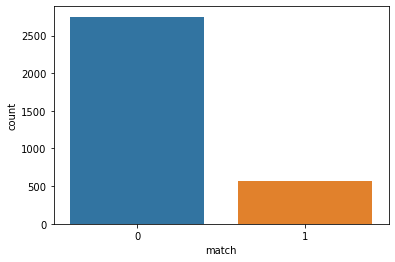

In [4]:
display(sns.countplot(x = datasamerace['match']))

## Count of match when not SameRace

<AxesSubplot:xlabel='match', ylabel='count'>

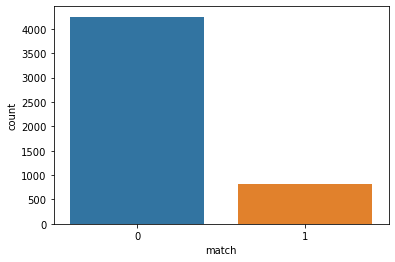

In [5]:
display(sns.countplot(x= datanotsamerace['match']))

## Age distribution of participants

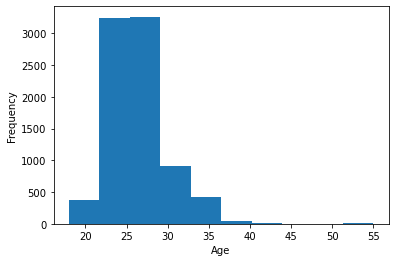

In [6]:
dataset['gender'] = dataset.gender.apply(lambda x: "female" if x==0 else "male")

age = dataset[np.isfinite(dataset['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

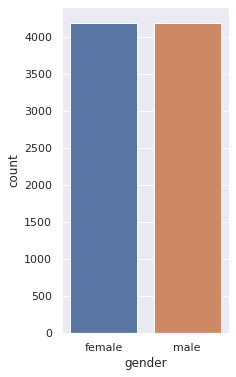

In [7]:
sns.set(rc={"figure.figsize": (3,6)})
sns.countplot(dataset.gender)

## Age of other vs attractiveness

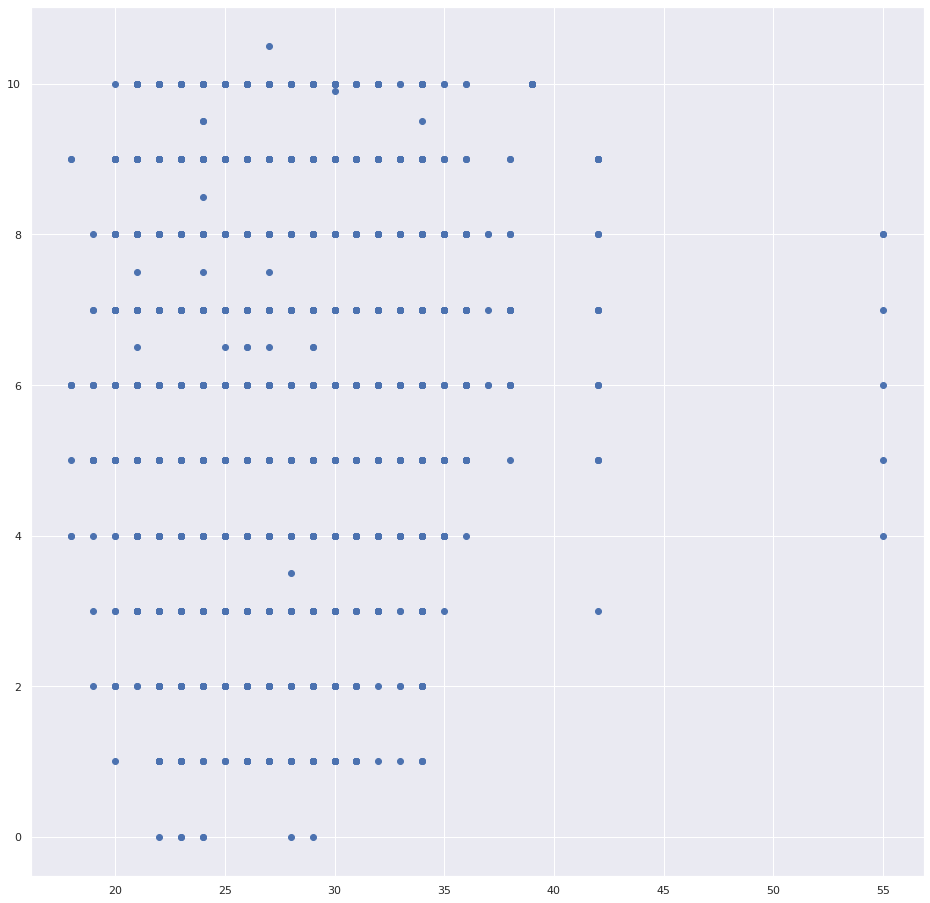

In [8]:
x = dataset['age_o']
y = dataset['attr_o']
plt.figure(figsize = (16, 16))
plt.scatter(x, y)
plt.show()

## Number of participants by race

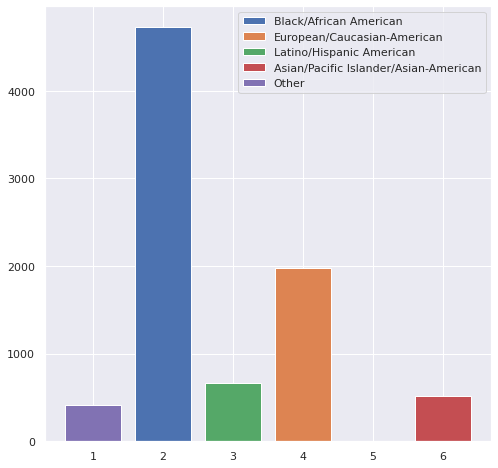

In [9]:
new_value = dataset['race'].value_counts()

plt.figure(figsize = (8, 8))
names = new_value.index
values = new_value.values
plt.bar(names[0], values[0])
plt.bar(names[1], values[1])
plt.bar(names[2], values[2])
plt.bar(names[3], values[3])
plt.bar(names[4], values[4])
plt.legend( ['Black/African American', 'European/Caucasian-American',
            'Latino/Hispanic American','Asian/Pacific Islander/Asian-American', 'Other'])
plt.show()

## Highest correlation with match

In [10]:
with pd.option_context('display.max_rows', None):
    display(dataset.corr()['match'].sort_values(ascending = False).head(25))

match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
shar_o      0.270840
shar        0.270679
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
them_cal    0.202762
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
num_in_3    0.156042
expnum      0.143755
amb         0.140042
amb_o       0.139927
match_es    0.130592
date_3      0.127916
numdat_3    0.114468
Name: match, dtype: float64

## Count by Study Category

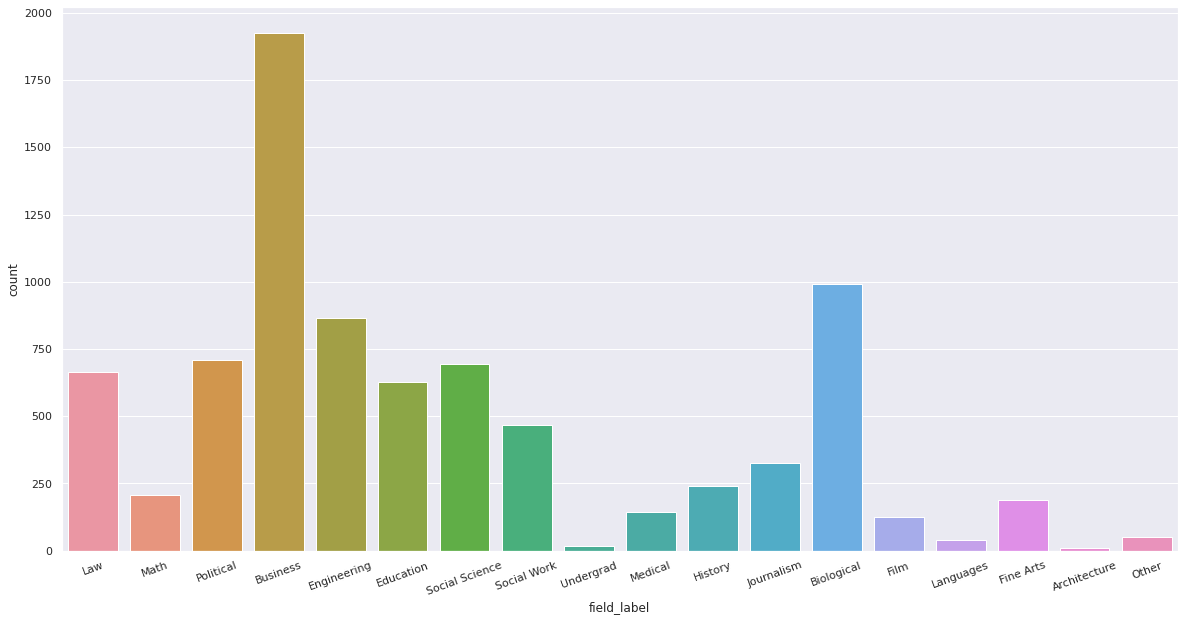

In [11]:
def get_field_label(x):
    labels = {
        1: "Law",
        2: "Math",
        3: "Social Science",
        4: "Medical",
        5: "Engineering",
        6: "Journalism",
        7: "History",
        8: "Business",
        9: "Education",
        10: "Biological",
        11: "Social Work",
        12: "Undergrad",
        13: "Political",
        14: "Film",
        15: "Fine Arts",
        16: "Languages",
        17: "Architecture",
        18: "Other",
    }
    return labels.get(x)

dataset["field_label"] = dataset["field_cd"].apply(get_field_label)

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=20)
graph = sns.countplot(x = dataset["field_label"], ax = ax)

## Match percentage by field study

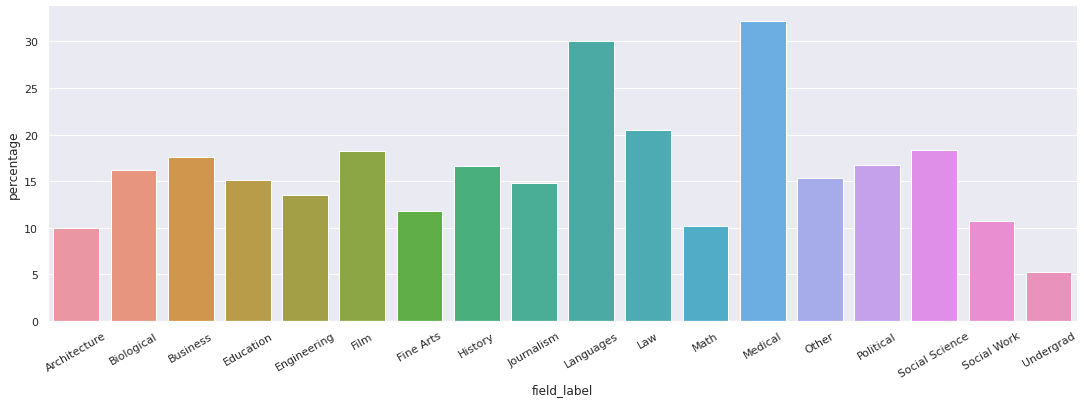

In [12]:
serieField = dataset.groupby('field_label').count()['iid']
serieMatch = dataset[dataset['match'] == 1].groupby('field_label').count()['iid']

# Pourcentage de match selon le type d'étude

percentageYesMatch = serieMatch / serieField * 100
percentageYesMatch

percentageDataFrame = pd.DataFrame({ 'percentage': percentageYesMatch, 'field_label': percentageYesMatch.keys() })
g = sns.catplot(x = "field_label", y = "percentage", kind = 'bar', data = percentageDataFrame, aspect = 3)
g.set_xticklabels(rotation=30)

## Correlation between match and total like

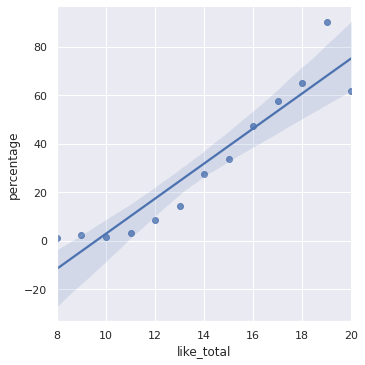

In [16]:
dataset['like_total'] = dataset['like'] + dataset['like_o']
like_total = dataset['like_total'].value_counts()

df1 = pd.DataFrame({ 'count': like_total, 'like_total': like_total.keys() }, index = like_total.keys()).sort_values(by = 'like_total')
df2 = dataset[dataset["match"] == 1].groupby(["like_total"]).count()[["iid"]]

total_like_data = df1.merge(df2, on = "like_total")
total_like_data["percentage"] = total_like_data["iid"] / total_like_data["count"] * 100
filtered_total = total_like_data[total_like_data["count"] > 19]

sns.lmplot(x = 'like_total', y = 'percentage', data = filtered_total)